Shy Ohev Zion - 318783479

Aviad Hedvat - 

#  Dataset Preprocessing

---


*   A good dataset is a key for successful model training.

*   This assignment guides you how to create two labeled datasets, which could later be used for
supervised learning.

---

## Overview

Image augmentations are used to increase the variability and robustness of a dataset

## Goals - Create a larger dataset from a smaller one



---


### Goals
1. 

  *   The original MNIST dataset includes images of single digits, in ten classes.
  *   Your goal is to create a new three-digit image dataset, with 101 classes, based on the original MNIST dataset.
2. 

  *   Create a dataset of shape images with three classes: (Triangle, Rectangle and Circle/Elipse)


---

### Tasks

1 - MNIST<br>
*  Download the mnist data usin the code snippet below <br> 
<code> import torchvision <br>
mnist_data = torchvision.datasets.MNIST(root='', download=True) <br>
this downloads the data to root ('') folder. Change the root to a convenient location. </code>
*  Show at least 5 samples of each class (0-9). Always add proper titles and choose the correct color
map
* Your new dataset should include the three-digits numbers: [000, 001, ..., 055, ..., 099, 100],
forming 101 classes. <br>
* Each class should have at least 4000 different samples. <br>
* Use the augmentations you created on lab 3 on your new dataset and show some results and
explain which augmentations are applicable to this specific dataset, which are not and why. <br>
* Each student should add about 10 new augmentations (you may use OpenCV). The total number
of augmentations will be 15. <br>
* Display typical results of your dataset, demonstrating the variability of the new dataset. <br>
* Write a detailed summary of your work.

2 - Shapes Dataset
* Shapes definition and functions requirements:
  * Minimal and maximal area: 100-600 pixels, the shape could not be cropped by image
boundaries.
  * Each shape will have random size, location, orientation and color.
  * Each image will include one of the following shapes:
    * Triangle
    * Rectangle
    * Circle/Elipse
  * Each image should be of dimensions 50x50x3.
  * Create at least 300 different samples of each class i.e.(circles with different radius, etc..)
  * Show the images you created without augmentations and with the augmentations from lab 3
  * Write a class, which loads the data you created, labels the data, i.e (triangle will be class 0,
rectangle 1, etc.. an Integer) and splits it to train and test sets. 90% of the data should be train
images and 10% test images. The class call should be as follows: 


3 - Summary
  * Write a short summary of everything you've done in this work


In [38]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
mnist_data = torchvision.datasets.MNIST(root="../data", download=True, train=True);

In [44]:
# Acessing the data within
mnist_images = mnist_data.data.numpy()
mnist_labels = mnist_data.targets.numpy()
print(mnist_images.shape)  # 60K Images with Dimension 28X28
print(f"There are {len(mnist_data.classes)} classes which are {mnist_data.classes}")

(60000, 28, 28)
There are 10 classes which are ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Text(0.5, 1.0, 'Label = 9')

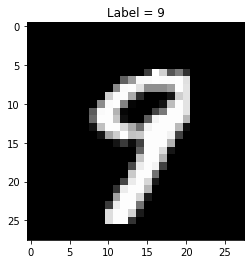

In [45]:
# Plot a random num
plt.rcParams["figure.figsize"] = (8, 4)
rand_indx = np.random.randint(len(mnist_images))
plt.imshow(mnist_images[rand_indx], cmap="gray")
plt.title(f"Label = {mnist_labels[rand_indx]}")

In [57]:
class_indices = {i: [] for i in range(len(mnist_data.classes))}

for index, label in enumerate(mnist_labels):
    class_indices[label].append(index)

l = list(map(lambda key: len(class_indices[key]), class_indices.keys()))

In [79]:
# str_labels = list(map(lambda label: f"{label[0]}{label[1]}{label[2]}", new_labels))
# print(str_labels)

triple_digit_dataset = list()  # full of {"image": [], "label": "..."}

rng = np.random.default_rng(2)

for i in range(101):
    text_label = f"{i:03d}"
    for i in range(5000):
        first = rng.choice(class_indices[int(text_label[0])])
        second = rng.choice(class_indices[int(text_label[1])])
        third = rng.choice(class_indices[int(text_label[2])])
        new_image = np.concatenate(
            (mnist_images[first], mnist_images[second], mnist_images[third]), axis=1,
        )
        triple_digit_dataset.append({"image": new_image, "label": text_label})
           
# for d in triple_digit_dataset:
#     plt.imshow(d["image"], cmap="gray")
#     plt.title(d["label"])
#     plt.show()

In [76]:
j = 2
print(f"{j:03d}")

002


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


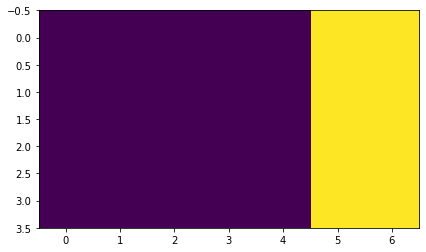

In [67]:
a = np.zeros((4,5))
print(a)
b = np.ones((4, 2))
print(b)
plt.imshow(np.concatenate((a, b), axis=1))